## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = mouse_data["Mouse ID"].nunique()

num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'])] 

dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# did that above

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = mouse_data[mouse_data['Mouse ID'] != 'g989']

clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_num = clean_mouse_data_df["Mouse ID"].nunique()

clean_mouse_data_num 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grp_clean_mouse_data_df = clean_mouse_data_df.groupby(["Drug Regimen"])

tv_mean = grp_clean_mouse_data_df['Tumor Volume (mm3)'].mean()

tv_median = grp_clean_mouse_data_df['Tumor Volume (mm3)'].median()

tv_variance = grp_clean_mouse_data_df['Tumor Volume (mm3)'].var()

tv_std = grp_clean_mouse_data_df['Tumor Volume (mm3)'].std()

tv_sem = grp_clean_mouse_data_df.sem()['Tumor Volume (mm3)']

tum_bydrug_sum = pd.DataFrame({
    
                                "Mean Tum Vol": tv_mean,
   
                                "Median Tum Vol": tv_median,
    
                                "Var Tum Vol": tv_variance,
   
                                "Std Tum Vol": tv_std ,
    
                                "Std Err Tum Vol": tv_sem ,
    

                                })
tum_bydrug_sum

,Mean Tum Vol,Median Tum Vol,Var Tum Vol,Std Tum Vol,Std Err Tum Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grp_clean_mouse_data_df = clean_mouse_data_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line
sum_df = grp_clean_mouse_data_df.agg(['mean', 'median', 'var', 'std', 'sem' ])['Tumor Volume (mm3)']
sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

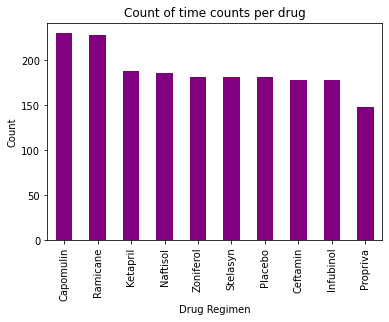

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#drugs = clean_mouse_data_df["Drug Regimen"].unique()

time_counts = clean_mouse_data_df["Drug Regimen"].value_counts()
time_counts.plot(kind='bar', title='Count of time counts per drug', color='purple')

plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

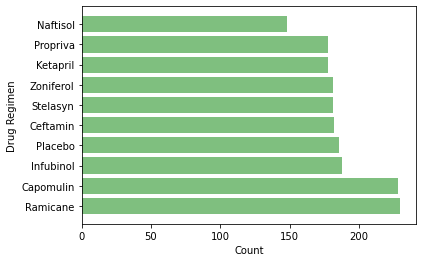

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_mouse_data_df["Drug Regimen"].unique()
time_counts = clean_mouse_data_df["Drug Regimen"].value_counts().values

plt.barh(drugs,time_counts, color='g', alpha=0.5, align='center')

plt.ylabel("Drug Regimen")
plt.xlabel("Count")

plt.show()

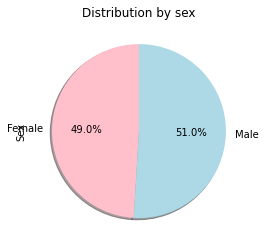

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_grp = clean_mouse_data_df.groupby(["Sex"])

sex_count = pd.DataFrame(sex_grp['Sex'].count())

sex_count.plot(kind='pie', y='Sex', title="Distribution by sex",startangle=90,\
                        autopct='%1.1f%%',shadow=True, colors =["pink","lightblue"],legend =False)

plt.show()

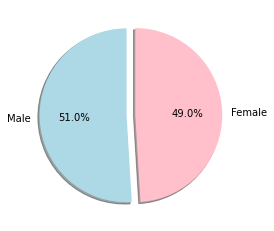

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_grp = clean_mouse_data_df.groupby(["Sex"])

sc = clean_mouse_data_df["Sex"].value_counts().values

explode = (0.1, 0)
labels = ["Male", "Female"]
colors = ["lightblue", "pink"]

plt.pie(sc, explode = explode, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

great_tp_df = pd.DataFrame(clean_mouse_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

great_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(clean_mouse_data_df, great_tp_df, on='Mouse ID')

merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
drug_values = []
outliers = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    tdf = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = tdf.loc[tdf['Timepoint'] == tdf['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and the (IQR) 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    print(f' ')
    
    # find upper and lower bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    print(f' ')
    
    # check for outliers
    outlier = final_volume_df['Tumor Volume (mm3)'][(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)].values
    
    print(f' outliers: {outlier}')
    print(f' ')
    

IQR for Capomulin: 7.781863460000004
 
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
 
 outliers: []
 
IQR for Ramicane: 9.098536719999998
 
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
 
 outliers: []
 
IQR for Infubinol: 11.477135160000003
 
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
 
 outliers: [36.3213458]
 
IQR for Ceftamin: 15.577752179999997
 
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
 
 outliers: []
 


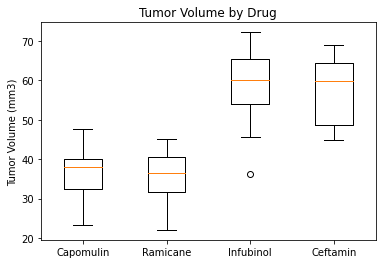

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



# Plot boxplot
plt.boxplot(drug_values)

# Add title and labels to boxplot
plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

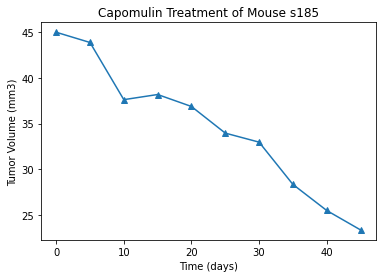

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = clean_mouse_data_df.loc[clean_mouse_data_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '^')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")


plt.show()

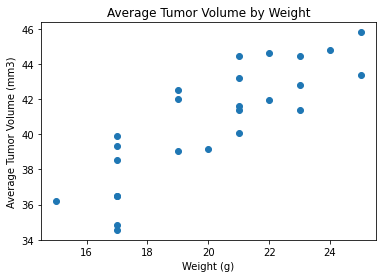

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_mouse_data_df.loc[clean_mouse_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = capomulin_df.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)':['mean'],"Weight (g)":['max']})

avg_vol_df.columns = avg_vol_df.columns.droplevel(1)


                          
 # Merge average tumor volume onto clean_mouse_data_df and drop duplicates
#avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')


x = avg_vol_df['Weight (g)']
y = avg_vol_df['Tumor Volume (mm3)']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The r^2 is 0.709.


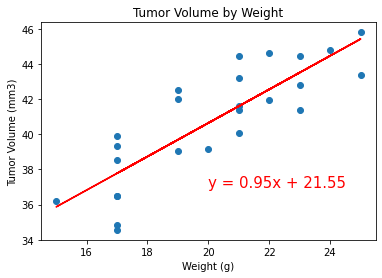

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Print the answer to above calculation
print(f"""The r^2 is {round(rvalue*rvalue,3)}.""")

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Tumor Volume by Weight')
plt.show()

